In [123]:
!cat test

2,2,2
1,2,2
3,2,2
2,1,2
2,3,2
2,2,1
2,2,3
2,2,4
2,2,6
1,2,5
3,2,5
2,1,5
2,3,5


In [50]:
fname = "test"
voxels = set(map(lambda x: tuple(map(int,x.split(","))),open(fname).read().split()))

In [31]:
max(max(v) for v in voxels)

6

In [44]:
def neighbors(v):
    x,y,z = v
    
    if x <= 30: yield x+1,y,z
    if x >= 0: yield x-1,y,z
    if y <= 30: yield x,y+1,z
    if y >= 0: yield x,y-1,z
    if z <= 30: yield x,y,z+1
    if z >= 0: yield x,y,z-1

In [22]:
list(neighbors((19,0,0)))

[(20, 0, 0), (18, 0, 0), (19, 1, 0), (19, -1, 0), (19, 0, 1), (19, 0, -1)]

### Part I

In [53]:
s = 0
for v in voxels:
    for neighbor in neighbors(v):
        if neighbor not in voxels:
            s+=1
s            
    

64

### Part II

In [55]:
s = 0
pos = (0,0,0)
seen = {pos}
flow_to = [pos]
while flow_to:
    pos = flow_to.pop()
    for new_pos in neighbors(pos):
        if new_pos not in seen:
            if new_pos in voxels:
                s+=1
            else:
                seen.add(new_pos)
                flow_to.append(new_pos)


#assert s==58, f"got wrong answer, got {s}"
s

58

In [56]:
# alternative recursive solution with state
# hits recurrsion error, but works with smaller world
flooded = set()
def flood(pos):
    flooded.add(pos)
    s = 0
    for n in neighbors(pos):
        if n in voxels:
            s+=1
        elif n not in flooded:
            s+=flood(n)
    return s

flood((0,0,0))

RecursionError: maximum recursion depth exceeded in comparison

### Visualize

In [57]:
%matplotlib notebook

<IPython.core.display.Javascript object>


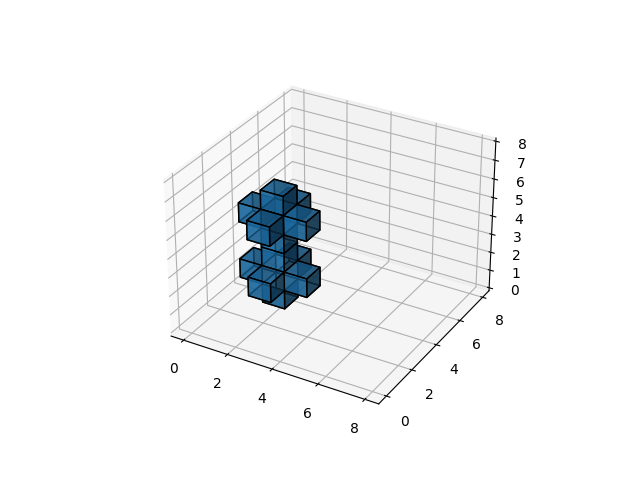

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between
# them
voxelarray = np.zeros_like(x)
for v in voxels:
    cube = (x == v[0]) & (y == v[1]) & (z == v[2])
    voxelarray |= cube

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(voxelarray,  edgecolor='k', alpha=0.7);